In [111]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [31]:
bank_df = pd.read_csv("train.csv")
bank_df.info(), bank_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


(None,
                  id    CustomerId   CreditScore           Age        Tenure  \
 count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
 mean    7499.500000  1.569146e+07    658.944133     37.739600      5.025267   
 std     4330.271354  1.352050e+05     72.255926      8.218363      2.776678   
 min        0.000000  1.581102e+06    431.000000     18.000000      0.000000   
 25%     3749.750000  1.563514e+07    603.000000     32.000000      3.000000   
 50%     7499.500000  1.569018e+07    662.000000     37.000000      5.000000   
 75%    11249.250000  1.575718e+07    708.000000     42.000000      7.000000   
 max    14999.000000  1.581569e+07    850.000000     74.000000     10.000000   
 
              Balance  NumOfProducts     HasCrCard  IsActiveMember  \
 count   15000.000000   15000.000000  15000.000000    15000.000000   
 mean    42729.791988       1.590933      0.788800        0.489667   
 std     59727.309419       0.532306      0.408174        0.4

In [64]:
bank_df


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


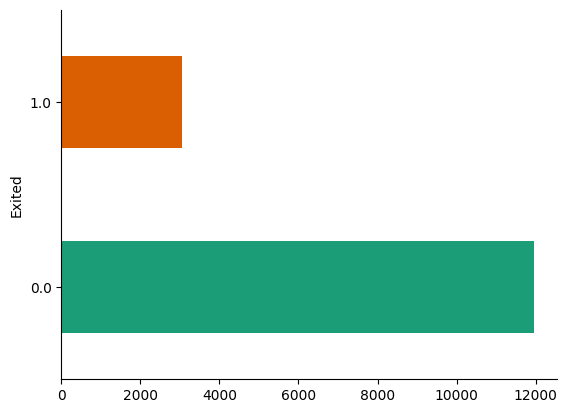

In [109]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
bank_df.groupby('Exited').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
categorical_columns = bank_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Унікальні значення в категоріальній колонці '{col}': {bank_df[col].unique()}")

Унікальні значення в категоріальній колонці 'Surname': ['Nwankwo' "Ch'in" 'Thompson' 'Macleod' 'Hsia' 'Hsieh' 'Kao' 'Hargreaves'
 'Hs?' 'Chukwuemeka' 'Hsueh' "P'an" 'Nwachukwu' 'Lucciano'
 'Ugochukwutubelum' 'Akobundu' 'Pagnotto' 'Ku' 'Lombardi' 'H?' 'Onochie'
 'Tuan' 'Chukwudi' "Ch'ang" 'McLean' 'Teng' 'Nnachetam' 'Aksakova'
 'Zetticci' 'Ndubuagha' 'Mazzanti' 'Onyemachukwu' 'Genovese' 'Ejimofor'
 'Mamelu' "Ch'ien" "Ts'ao" 'Chukwufumnanya' 'Cattaneo' 'Maclean'
 'Echezonachukwu' 'Chiang' 'Tsou' 'Biryukov' 'Chidubem' 'Fisk'
 'Chukwubuikem' 'Hsiao' "Ch'iu" 'Maughan' 'Onyinyechukwuka' 'Hsiung'
 'Macdonald' 'Aksyonova' 'Pirozzi' 'Fomin' 'Chiekwugo' 'Hirst' 'Okechukwu'
 "T'ao" 'Ross' 'Iweobiegbunam' "P'eng" 'Shih' 'Fenton' "Ch'eng" 'Lettiere'
 "T'ien" 'Yermolayev' 'Kornilova' 'Onyekachi' 'Uvarov' 'Okwukwe' 'Bogle'
 'Palerma' 'Li' 'Dike' 'Milne' 'Trevisani' 'Mironova' 'Bazarova'
 'Onwumelu' 'Chibueze' 'Uspensky' 'Milanesi' 'Palermo' 'Olisaemeka'
 'Nnamdi' 'Nkemdilim' 'Brown' 'Chiazagomekpere'

Бачимо 3 категоріальні колонки та всі інші числові. З усіх колонок для побудови моделі не будемо використовувати прізвище, та id клієнта.

input_cols ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

 numeric_cols ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

 categorical_cols ['Geography', 'Gender']
F1 score: 0.64%


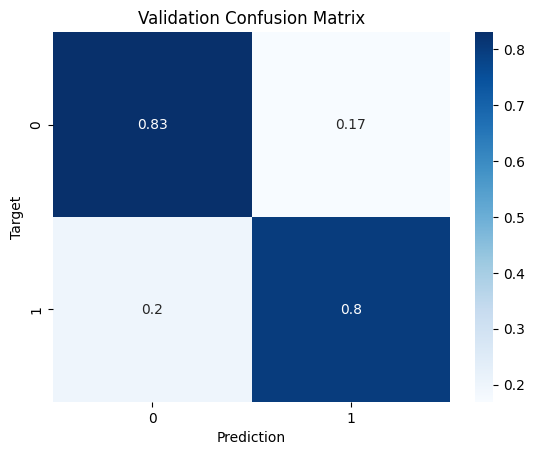

F1 score: 0.65%


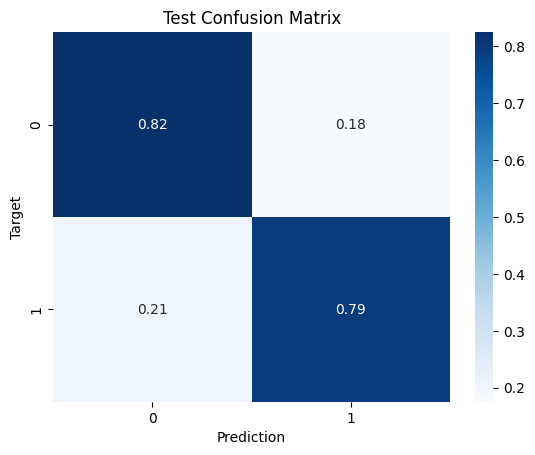

(array([[0.75898823, 0.24101177],
        [0.86161909, 0.13838091],
        [0.60914941, 0.39085059],
        ...,
        [0.93542619, 0.06457381],
        [0.62794659, 0.37205341],
        [0.76925143, 0.23074857]]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.24101177, 0.13838091, 0.39085059, ..., 0.06457381, 0.37205341,
        0.23074857]))

In [104]:
# Create training, validation and test sets
train_val_df, test_df = train_test_split(bank_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

# Create inputs and targets
# exclude id, customer_id, surname and. target column
input_cols = list(train_df.columns)[3:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]
test_inputs, test_targets = test_df[input_cols], test_df[target_col]

# # Identify numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()
print("input_cols", input_cols)
print("\n numeric_cols", numeric_cols)
print("\n categorical_cols", categorical_cols)

# # Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that includes preprocessing and the model
# оскільки дані не збалансовані, то використала class_weight='balanced'
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

# # Train the model
model_pipeline.fit(train_inputs, train_targets)

# Helper function to predict, compute accuracy & plot confusion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    f1 = f1_score(targets, preds)
    print("F1 score: {:.2f}%".format(f1))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(val_inputs, val_targets, 'Validation')
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')
test_df_from_kaggle = pd.read_csv("test.csv")
test_inputs_from_kaggle = test_df_from_kaggle[input_cols]
predicted_exited = model_pipeline.predict_proba(test_inputs_from_kaggle)[:, 1]
model_pipeline.predict_proba(test_inputs_from_kaggle),model_pipeline.predict(test_inputs_from_kaggle), predicted_exited

In [115]:
def all_no(inputs):
  return np.full(len(inputs), 0)

def random_guess(inputs):
  return np.random.choice([0, 1], len(inputs))
accuracy_score(test_targets, random_guess(test_inputs)), accuracy_score(test_targets, all_no(test_inputs)), accuracy_score(test_targets, model_pipeline.predict(test_inputs))

(0.5103333333333333, 0.7903333333333333, 0.8183333333333334)

Бачимо, що точність нашої моделі краща, за рандомне заповнення та визначення всіх, як тих, що не підуть з банку

In [107]:
output_df = test_df_from_kaggle[['id']].copy()
output_df['Exited'] = predicted_exited
output_df.to_csv("predictions.csv", index=False)
